# Explore Feature Correlations with graphics

(Linda Cobb, http://github.com/timestocome)

### Lots of features and a huge dataset make it difficult to analyze data with list of numbers

### Loops have been set to only loop over a few samples, use can use the commented line below to go through full dataset


### * edit: correlations are strongest with larger numbers so graph plot should invert that so that stronger correlations closer to zero, weaker ones closer to one





## Import libraries


In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=300
pd.options.display.max_columns=300

from typing import List

import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Fetch data

In [2]:
# load up data
train = pd.read_csv('../input/jane-street-market-prediction/train.csv')


In [3]:
# sanity check data
print(train.head())

   date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2     0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3     0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4     0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0          1  -1.872746  -2.191242  -0.474163  -0.323046   0.014688   
1         -1  -1.349537  -1.704709   0.068058   0.028432   0.193794   
2         -1   0.812780  -0.256156   0.806463   0.400221  -0.614188   
3         -1   1.174378   0.344640   0.066872   0.009357  -1.006373   
4          1  -3.172026  -3.093182  -0.161518  -0.128149  -0.195006   

   feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0  -0.002484        NaN        NaN  -0.989982   -1.055090         N

In [4]:

# load up feature meta-data
feature_info = pd.read_csv('../input/jane-street-market-prediction/features.csv')


In [5]:
# sanity check 

print(feature_info.describe(include='all'))
tag_features = features = [c for c in feature_info.columns if 'tag_' in c]
print(tag_features)

           feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  \
count          130    130    130    130    130    130    130    130    130   
unique         130      2      2      2      2      2      2      2      2   
top     feature_56  False  False  False  False  False  False  False  False   
freq             1    113    113    113    113    113    122     90    128   

        tag_8  tag_9 tag_10 tag_11 tag_12 tag_13 tag_14 tag_15 tag_16 tag_17  \
count     130    130    130    130    130    130    130    130    130    130   
unique      2      2      2      2      2      2      2      2      2      2   
top     False  False  False  False  False  False  False  False  False  False   
freq      128    109    128    120    114    114    127    104    123    103   

       tag_18 tag_19 tag_20 tag_21 tag_22 tag_23 tag_24 tag_25 tag_26 tag_27  \
count     130    130    130    130    130    130    130    130    130    130   
unique      2      2      2      2      2      2

### Build correlation dataframe, convert to link dataframe, plot graphs

n samples 239049
tag_0


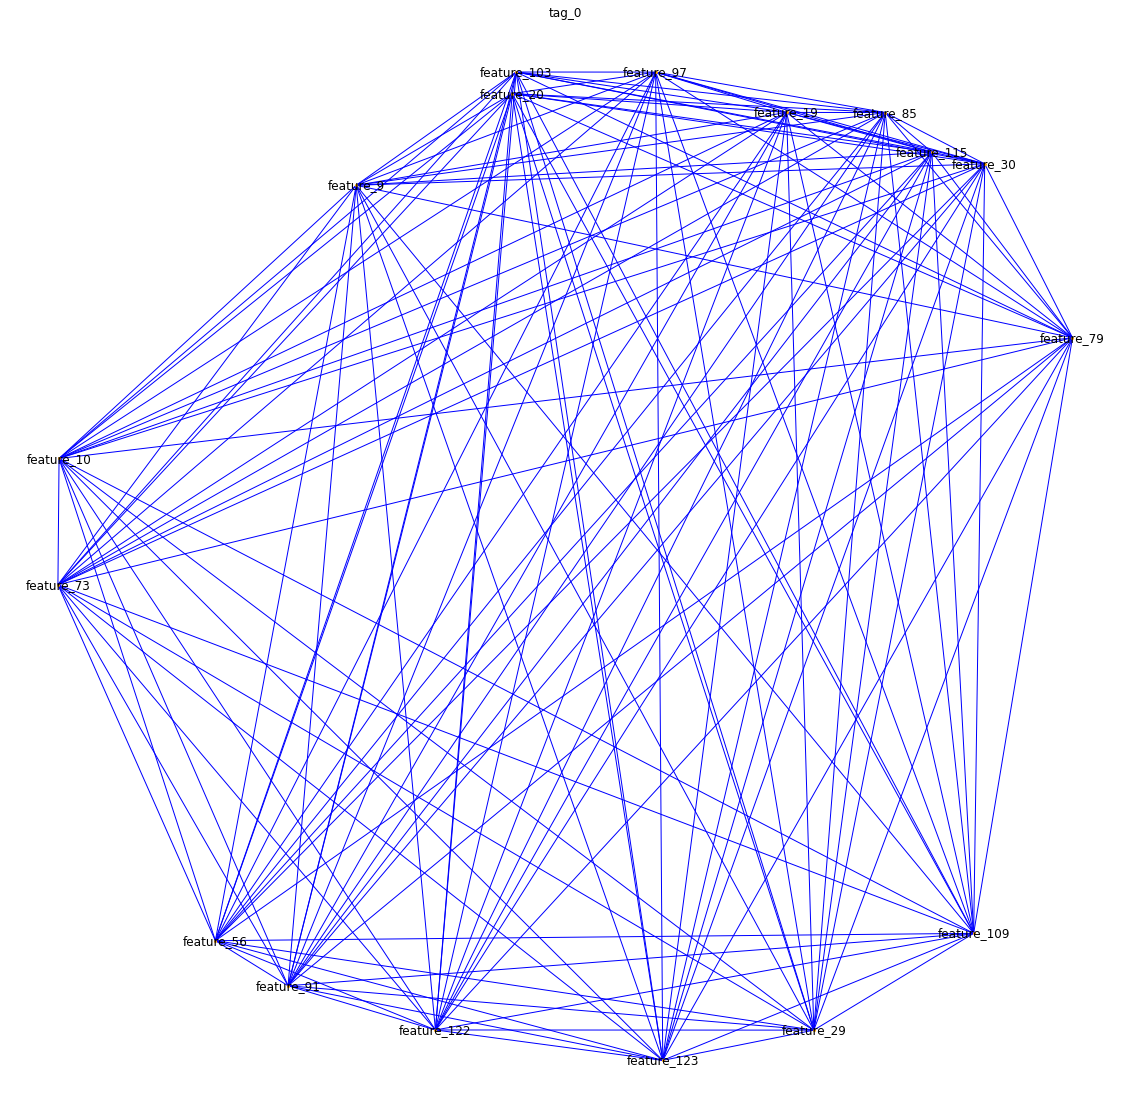

tag_1


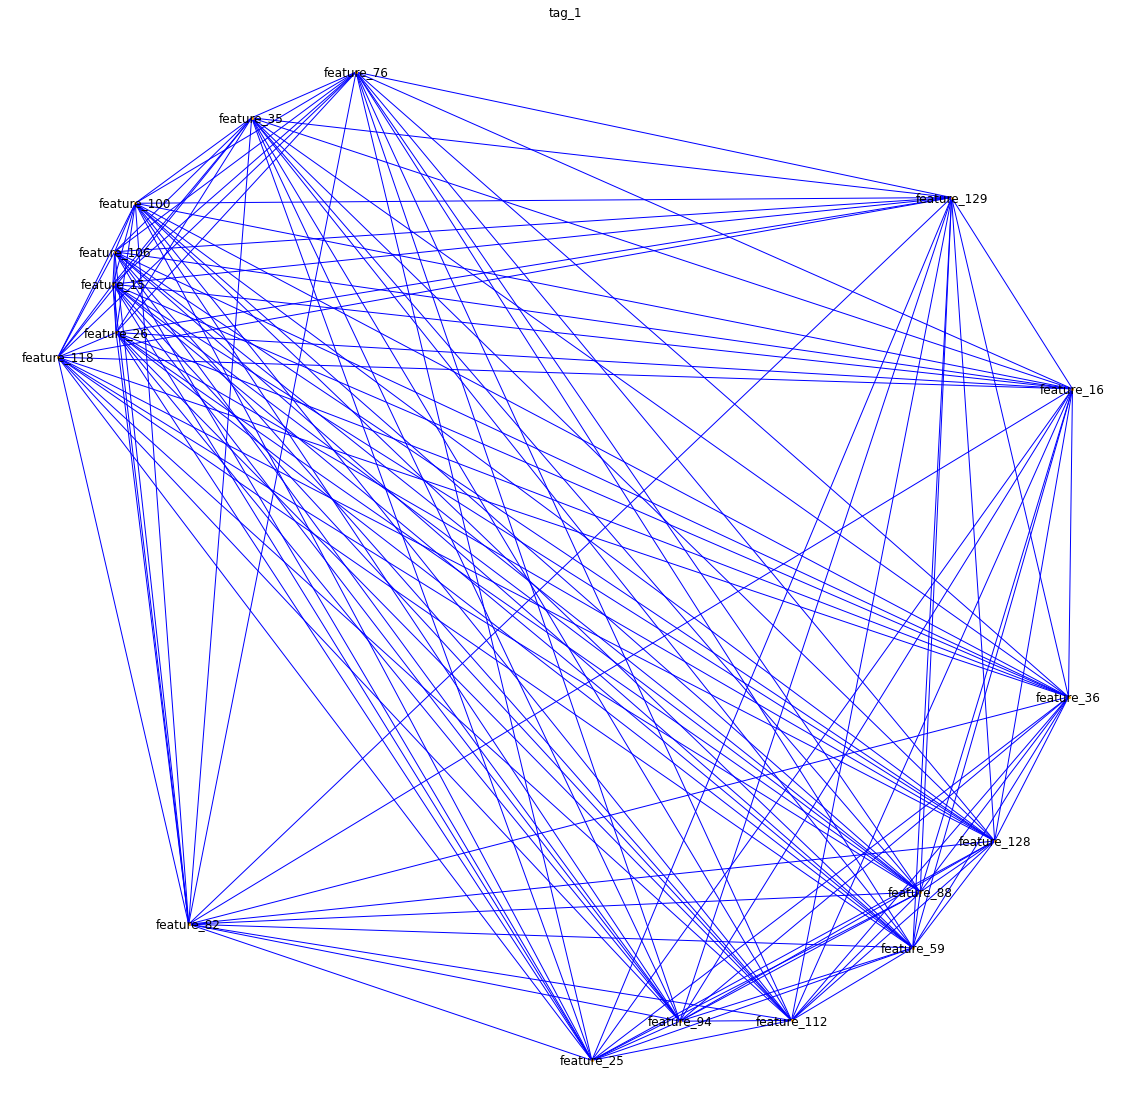

tag_2


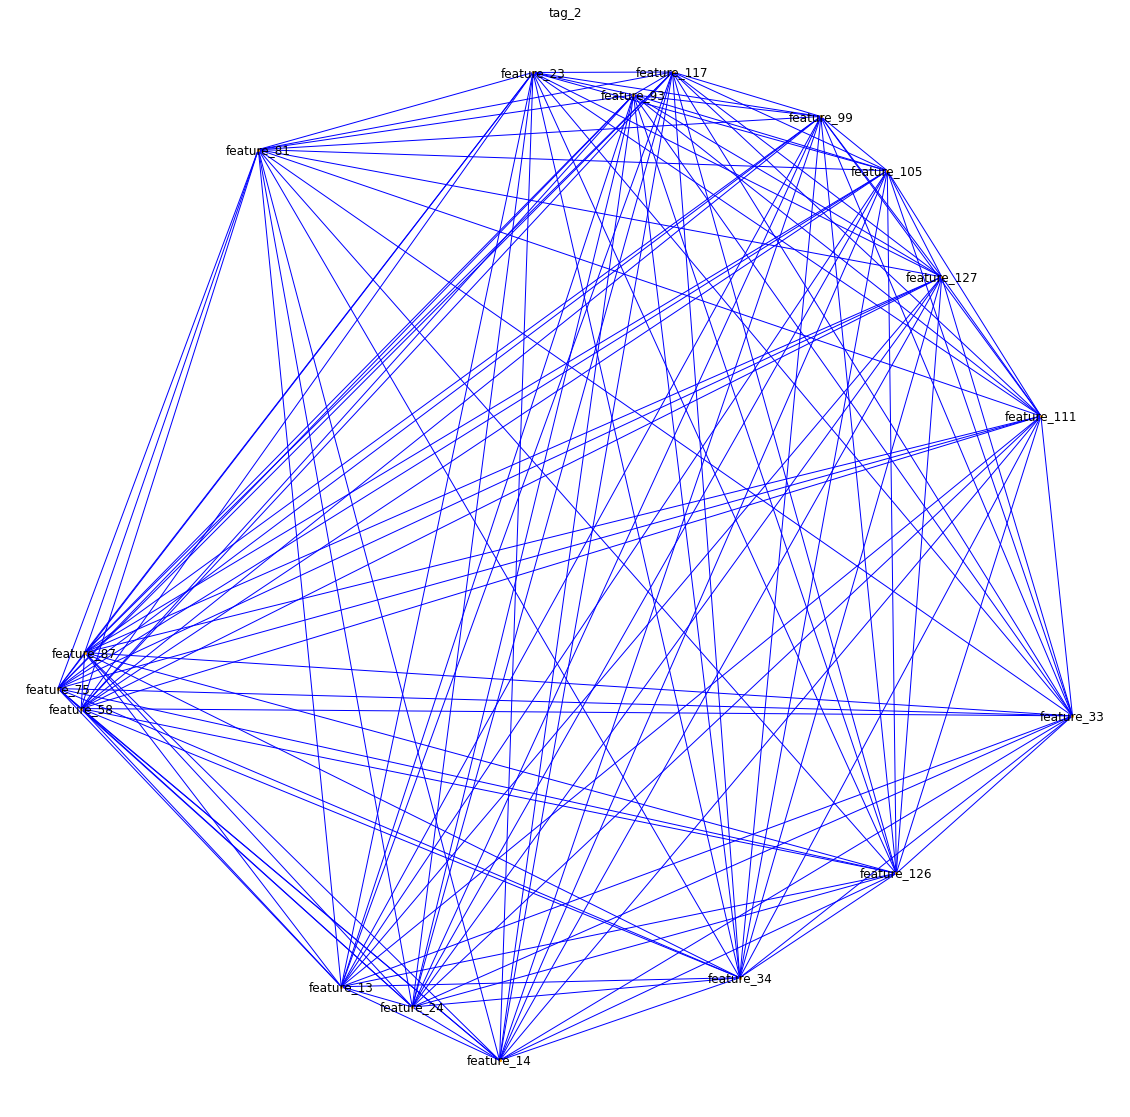

In [6]:

# tagged features are strongly correlated
# graph correlations between features by tag

sample_data = train.sample(frac=.1)
n_samples = len(sample_data)
n_features = len(features)
print('n samples', n_samples)

tags = tag_features
n_tags = len(feature_info)



for i in range(3):
#for i in range(n_features):

    tag = tags[i]
    print(tag)

    feature_list = list(feature_info[feature_info[tag] == True]['feature'])
    
    z = sample_data[feature_list]
    corr_df = np.abs(z.corr())
    
    # stronger correlations have larger values so reverse it to show stronger correlations 
    # closer and weaker corrrelations further apart
    corr_df = corr_df - 1
    
 

    links_df = corr_df.stack().reset_index()
    links_df.columns = ['source', 'target', 'weight']
    
    plt.figure(figsize=(20,20))
    plt.title(tags[i])
    g = nx.from_pandas_edgelist(links_df, 'source', 'target', 'weight')
    nx.draw(g, with_labels=True, node_color='orange', node_size=4, edge_color='blue')
    plt.show()


### Look for temporal patterns, (idea from https://www.kaggle.com/lachlansuter/important-and-hidden-temporal-data )

In [7]:
# fetch a sample of data from middle to avoid edge weirdness, if any
ordered_sample = train.loc[10000:80000]
print(len(ordered_sample))

70001


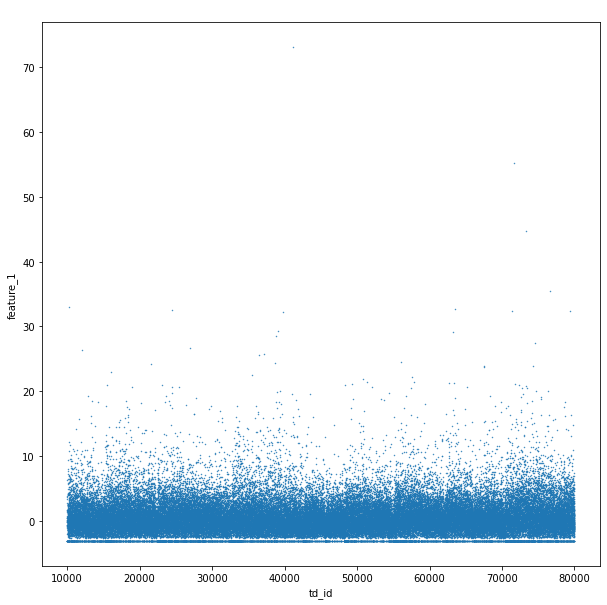

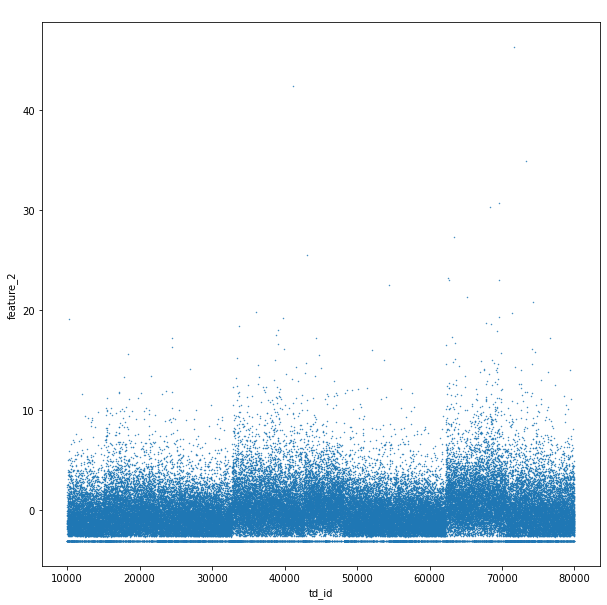

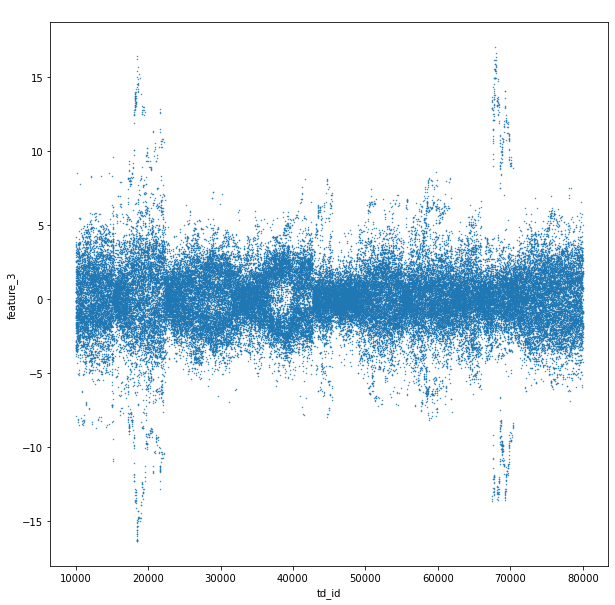

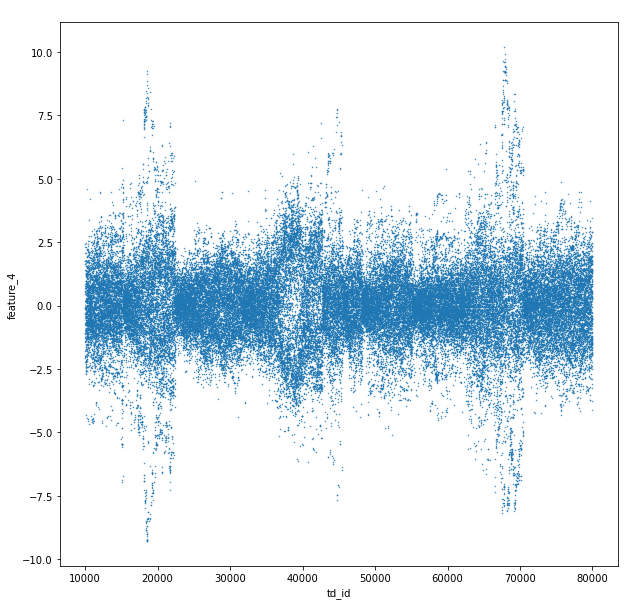

In [8]:
# look for time patterns in features vs time stamp id
features = [c for c in train.columns if 'feature_' in c]
n_features = len(features)

def plotFeatureSplits(df, f):

        plt.figure(figsize=(10, 10))

        plt.scatter(df['ts_id'], df[f], s=.2)
        plt.title(f, color='white')
        plt.ylabel(f)
        plt.xlabel('td_id')
        plt.show()
        
        
# sample run just to check or run all range(1, n_features)
# skip feature_0
for i in range(1, 5):
#for i in range(1, len(features)):
    plotFeatureSplits(ordered_sample, features[i])